### **2.6.1 基本概率论**

假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果
都有相同的可能发生， 因此我们可以说
发生的概率为
 
。

然而现实生活中，对于我们从工厂收到的真实骰子，我们需要检查它是否有瑕疵。 检查骰子的唯一方法是多次投掷并记录结果。 对于每个骰子，我们将观察到
中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！

首先，我们导入必要的软件包。

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引
处的值是采样结果中
出现的次数

In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1460, 0.1560, 0.1770, 0.1760, 0.1740, 0.1710])

进行500组实验，每组抽取10个样本

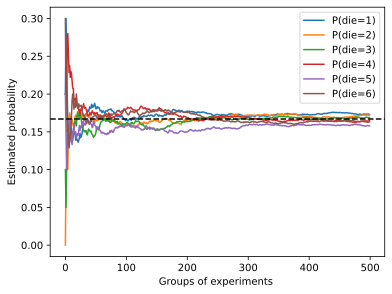

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments ')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这
条实体曲线向真实概率收敛。

In [11]:
# test
fair_probs, counts, cum_counts, estimates

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([[2., 0., 1., 2., 2., 3.],
         [4., 2., 0., 2., 1., 1.],
         [2., 1., 2., 3., 0., 2.],
         ...,
         [1., 1., 2., 3., 0., 3.],
         [1., 1., 0., 2., 1., 5.],
         [0., 3., 2., 3., 1., 1.]]),
 tensor([[  2.,   0.,   1.,   2.,   2.,   3.],
         [  6.,   2.,   1.,   4.,   3.,   4.],
         [  8.,   3.,   3.,   7.,   3.,   6.],
         ...,
         [864., 857., 842., 819., 787., 811.],
         [865., 858., 842., 821., 788., 816.],
         [865., 861., 844., 824., 789., 817.]]),
 tensor([[0.2000, 0.0000, 0.1000, 0.2000, 0.2000, 0.3000],
         [0.3000, 0.1000, 0.0500, 0.2000, 0.1500, 0.2000],
         [0.2667, 0.1000, 0.1000, 0.2333, 0.1000, 0.2000],
         ...,
         [0.1735, 0.1721, 0.1691, 0.1645, 0.1580, 0.1629],
         [0.1733, 0.1719, 0.1687, 0.1645, 0.1579, 0.1635],
         [0.1730, 0.1722, 0.1688, 0.1648, 0.1578, 0.1634]]))

#### **2.6.1.1ga